#Visualisation of the Iris Data Set
######Submitted by Aditya Kothapalli - 20062882

###1. First load the Iris data set

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.datasets import load_iris
iris = load_iris()


df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head(1)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


###2. Create a single histogram-plot for every dimension using matplotlib

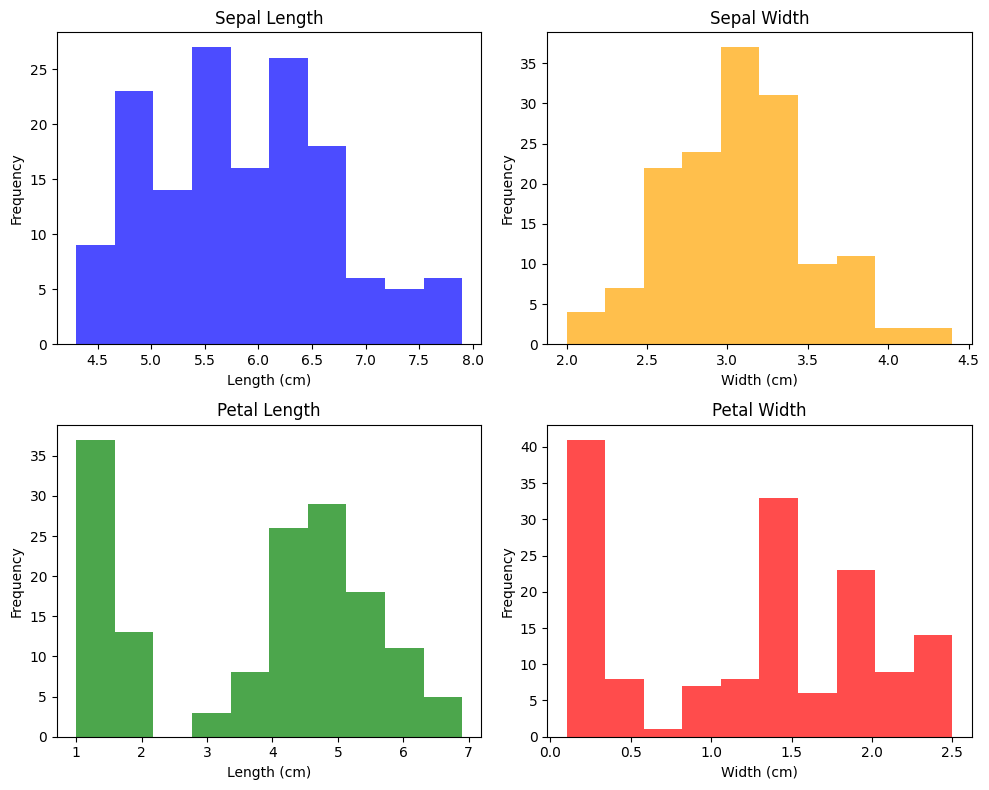

In [37]:
# Create a figure with subplots - as weneed a sinlge plot to show histograms of all dimensions
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Create histograms for each feature
axs[0, 0].hist(df['sepal length (cm)'], bins = 10, color = 'blue', alpha = 0.7)
axs[0, 0].set_title('Sepal Length')
axs[0, 0].set_xlabel('Length (cm)')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df['sepal width (cm)'], bins = 10, color = 'orange', alpha = 0.7)
axs[0, 1].set_title('Sepal Width')
axs[0, 1].set_xlabel('Width (cm)')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(df['petal length (cm)'], bins = 10, color = 'green', alpha = 0.7)
axs[1, 0].set_title('Petal Length')
axs[1, 0].set_xlabel('Length (cm)')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['petal width (cm)'], bins = 10, color = 'red', alpha = 0.7)
axs[1, 1].set_title('Petal Width')
axs[1, 1].set_xlabel('Width (cm)')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

###3. Create a 4x4 plot containing the four histograms side by side

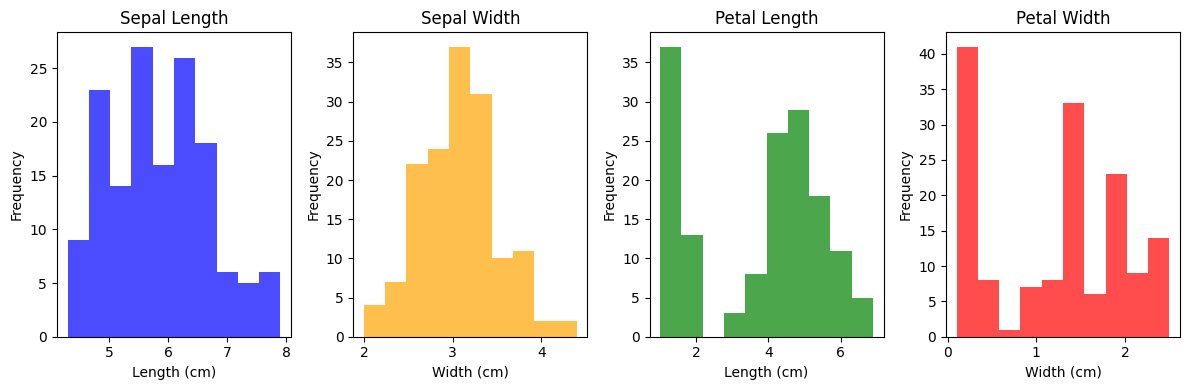

In [38]:
# Create a figure with subplots (2x2)
fig, axs = plt.subplots(1, 4, figsize=(12, 4)) #showing 4 rows & 1 column

# Create histograms for each feature
axs[0].hist(df['sepal length (cm)'], bins = 10, color = 'blue', alpha = 0.7)
axs[0].set_title('Sepal Length')
axs[0].set_xlabel('Length (cm)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['sepal width (cm)'], bins = 10, color = 'orange', alpha = 0.7)
axs[1].set_title('Sepal Width')
axs[1].set_xlabel('Width (cm)')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['petal length (cm)'], bins = 10, color = 'green', alpha = 0.7)
axs[2].set_title('Petal Length')
axs[2].set_xlabel('Length (cm)')
axs[2].set_ylabel('Frequency')

axs[3].hist(df['petal width (cm)'], bins = 10, color = 'red', alpha = 0.7)
axs[3].set_title('Petal Width')
axs[3].set_xlabel('Width (cm)')
axs[3].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

###4. Create a single histogram-plot containing all dimensions

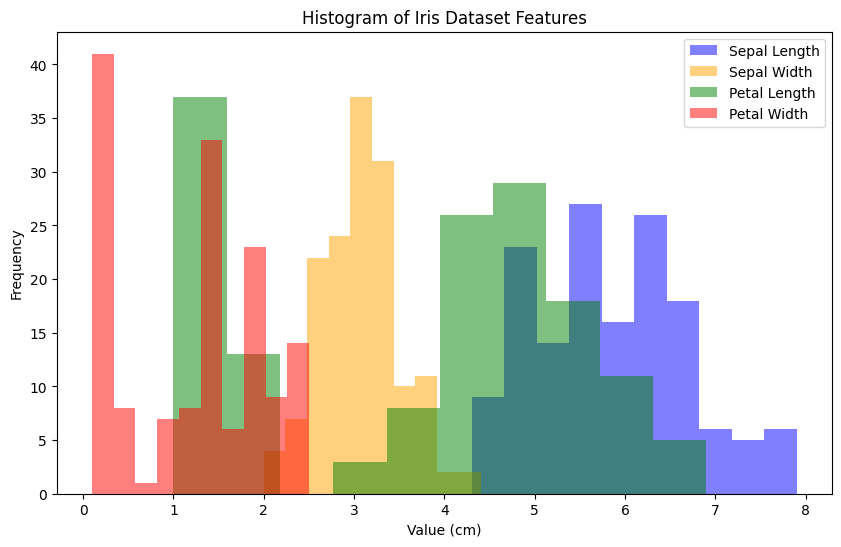

In [39]:
# Create a single histogram plot for all dimensions
plt.figure(figsize=(10, 6))

# Plot histograms for each feature
plt.hist(df['sepal length (cm)'], bins = 10, color = 'blue', alpha = 0.5, label = 'Sepal Length')
plt.hist(df['sepal width (cm)'], bins = 10, color = 'orange', alpha = 0.5, label = 'Sepal Width')
plt.hist(df['petal length (cm)'], bins = 10, color = 'green', alpha = 0.5, label = 'Petal Length')
plt.hist(df['petal width (cm)'], bins = 10, color = 'red', alpha = 0.5, label = 'Petal Width')

# Add titles and labels
plt.title('Histogram of Iris Dataset Features')
plt.xlabel('Value (cm)')
plt.ylabel('Frequency')
plt.legend()  # Show legend

# Show the plot
plt.show()

###5. Create a boxplot over the four dimensions

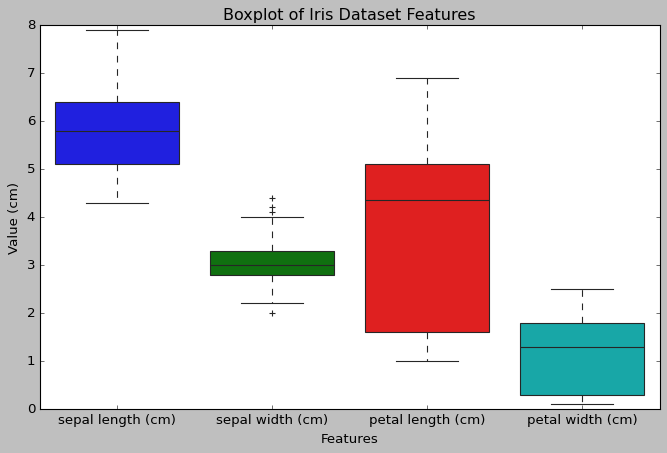

In [51]:
# Create a boxplot for the four dimensions
plt.figure(figsize = (10, 6))
sns.boxplot(data=df.iloc[:, :-1])  # Exclude the 'species' column

# Add titles and labels
plt.title('Boxplot of Iris Dataset Features')
plt.xlabel('Features')
plt.ylabel('Value (cm)')

# Set the style to dark background
plt.style.use('ggplot')

# Show the plot
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

###6. Implement a function that creates a scatter plot matrix, where the main diagonal are either boxplots or histograms and classes

Enter the type of ploy you would like to see, Histogram or boxplot: boxplot


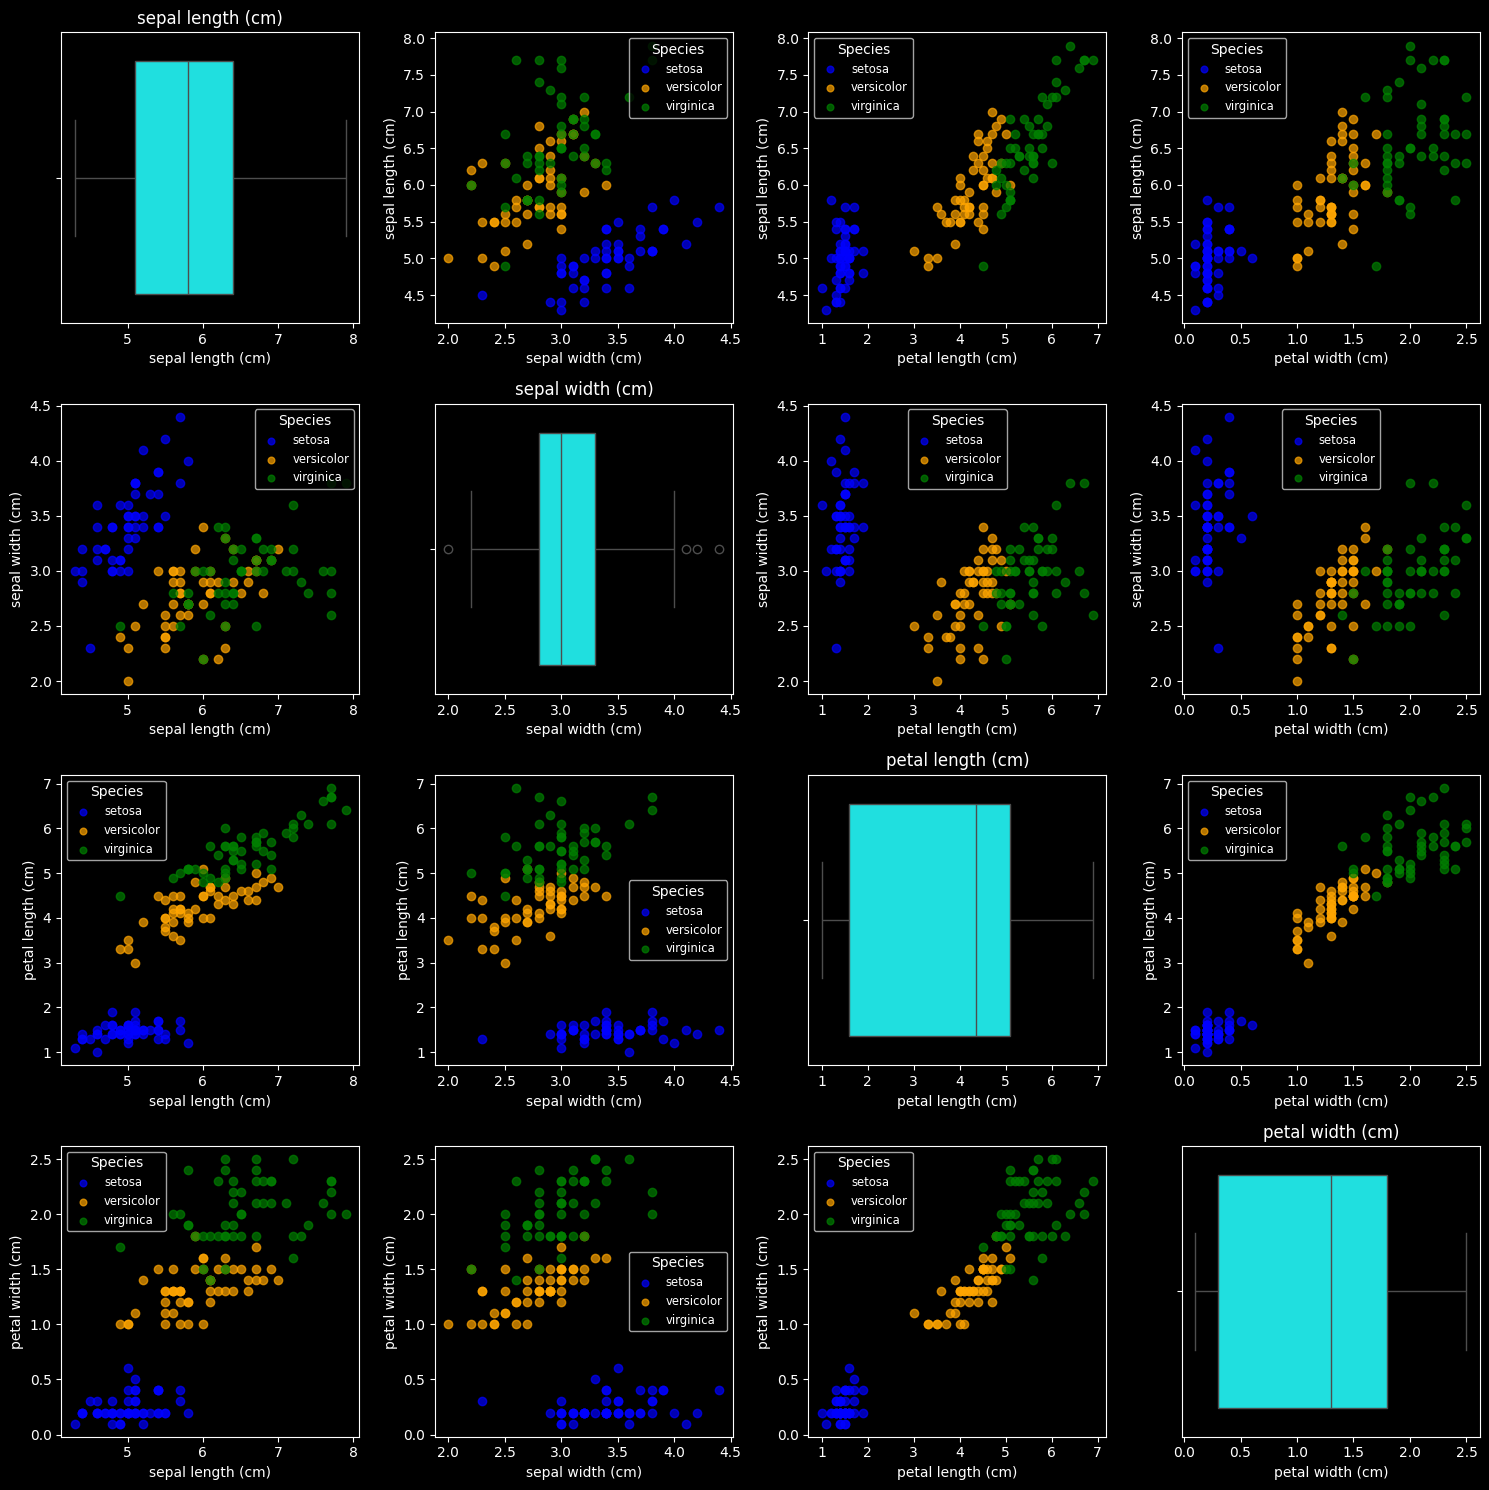

In [44]:
def scatter_plot_matrix(data, diag_kind='boxplot'):
    """
    Create a scatter plot matrix with boxplots or histograms on the diagonal,
    and color the points based on the species.

    Parameters:
    - data: DataFrame containing the data to plot.
    - diag_kind: 'boxplot' or 'histogram' for the diagonal plots.
    """
    # Get the number of features
    num_features = data.shape[1] - 1  # Exclude the species column
    fig, axs = plt.subplots(num_features, num_features, figsize=(15, 15))

    # Define colors for each species
    colors = {'setosa': 'blue', 'versicolor': 'orange', 'virginica': 'green'}

    # Create scatter plots and diagonal plots
    for i in range(num_features):
        for j in range(num_features):
            if i == j:  # Diagonal
                if diag_kind == 'boxplot':
                    sns.boxplot(x = data.iloc[:, i], ax = axs[i, j], color = 'cyan')
                elif diag_kind == 'histogram':
                    axs[i, j].hist(data.iloc[:, i], bins = 10, color = 'cyan', alpha = 0.7)
                axs[i, j].set_title(data.columns[i])
            else:  # Off-diagonal
                for species, color in colors.items():
                    subset = data[data['species'] == species]
                    axs[i, j].scatter(subset.iloc[:, j], subset.iloc[:, i],
                                      alpha = 0.7, label = species, color = color)
                axs[i, j].set_xlabel(data.columns[j])
                axs[i, j].set_ylabel(data.columns[i])
                axs[i, j].legend(title='Species', fontsize = 'small', loc = 'best', markerscale = 0.8)

    plt.tight_layout()
    plt.show()

# Set the style to dark background
plt.style.use('dark_background')

# Call the function to create the scatter plot matrix with boxplots on the diagonal
graph = input("Enter the type of ploy you would like to see, Histogram or boxplot: ").lower()
if graph == 'histogram':
  scatter_plot_matrix(df, diag_kind='histogram')
elif graph == 'boxplot':
  scatter_plot_matrix(df, diag_kind='boxplot')
else:
  print('Error! Enter either histogram or boxplot only')